

### LSTM stands for Long Short-Term Memory.
It's a type of recurrent neural network (RNN) architecture designed to handle the issue of vanishing gradients, which can occur when training traditional RNNs on long sequences of data. LSTM networks are well-suited for sequence prediction problems, such as language modeling, speech recognition, and time series forecasting. They achieve this by using a memory cell that can maintain information over long periods of time, allowing them to capture dependencies and patterns in sequential data more effectively than standard RNNs.

### LSTM Gates
1. Forget Gate: Controls what information from the previous cell state should be discarded or kept based on the current input.

2. Input Gate: Determines which new information from the current input should be stored in the cell state.

3. Cell State: Represents the memory of the LSTM, preserving information over long sequences by selectively adding or removing information.

4. Output Gate: Filters the information from the current cell state to produce the output based on the current input and the LSTM's internal state.

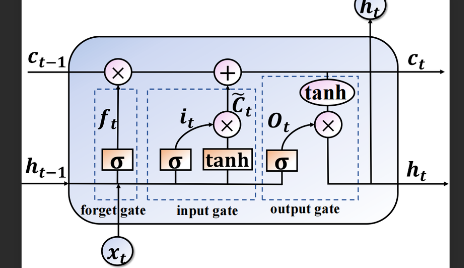
#### LSTM (Long Short-Term Memory) is a type of RNN (Recurrent Neural Network) designed to address the issue of capturing long-term dependencies in sequential data.

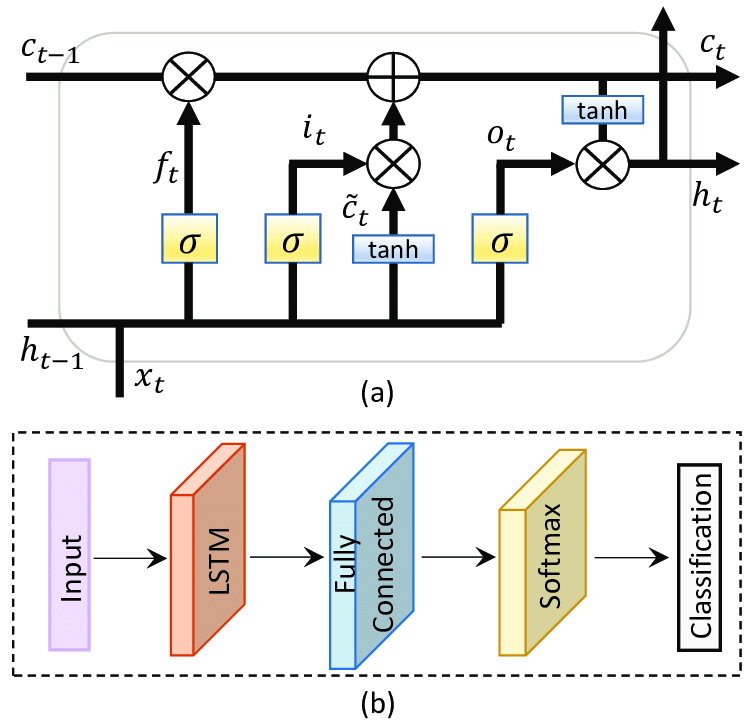
- LSTMs have a memory cell that can retain information over long periods.
- They incorporate gating mechanisms (input, forget, and output gates) to control the flow of information into and out of the memory cell.
- Input gate: Determines which new information to incorporate into the memory cell.
- Forget gate: Decides which information to discard from the memory cell.
- Output gate: Regulates the information output from the memory cell to the next time step.
- LSTMs are trained using backpropagation through time (BPTT), allowing them to learn to capture long-range dependencies in the data.
- LSTMs are widely used in tasks such as language modeling, speech recognition, and time series prediction due to their ability to effectively capture long-range dependencies.


### A simple example of an LSTM network using Python and the Keras library


- Example Data: We create a simple sequential dataset (data) where each row has two features. LSTM expects input in the form [samples, time steps, features], so we reshape data accordingly.

- LSTM Model: We define a sequential Keras model (Sequential) and add an LSTM layer (LSTM) with 50 units (you can adjust this number as needed), using ReLU activation function. The input_shape specifies that each sample has 1 time step and 2 features.

In [1]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example data
# Let's create some simple sequential data for demonstration
data = np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5], [0.5, 0.6]])

# Reshape data for LSTM input [samples, time steps, features]
data = data.reshape((data.shape[0], 1, data.shape[1]))

# Creating LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 2)))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Fitting the model
model.fit(data, data, epochs=300, verbose=0)

# Predicting on new data (similar to the input data for simplicity)
predictions = model.predict(data, verbose=0)

# Printing predictions
print(predictions)


[[0.2803169 ]
 [0.3102817 ]
 [0.34095466]
 [0.37233955]
 [0.4044395 ]]


### Generating an arithmetic series using an LSTM 

- An arithmetic series is a sequence of numbers in which the difference between consecutive terms is constant. Mathematically, an arithmetic series can be defined as follows:
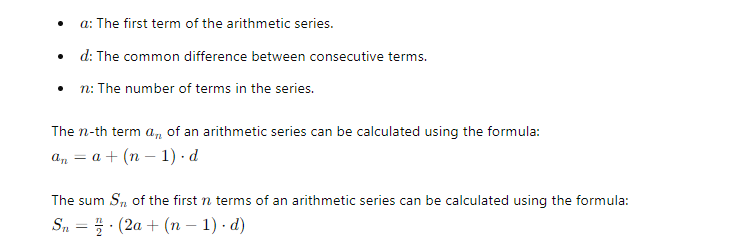
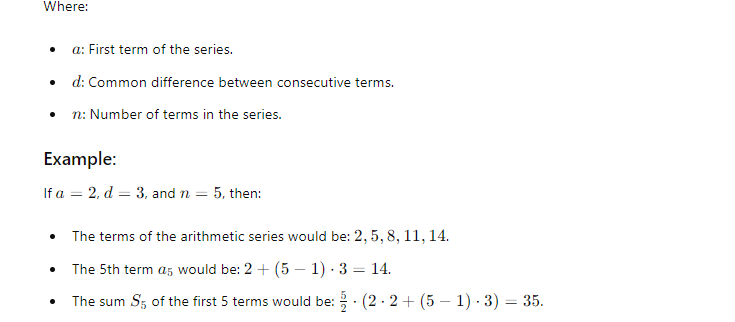

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to generate an arithmetic series
def generate_arithmetic_series(start, length, step):
    series = []
    current_value = start
    for _ in range(length):
        series.append(current_value)
        current_value += step
    return series

# Generating an arithmetic series as training data
start = 1
length = 20
step = 3
arithmetic_series = generate_arithmetic_series(start, length, step)

# Preparing data for LSTM input and output
X = np.array(arithmetic_series[:-1]).reshape(1, length-1, 1)  # Input sequence
y = np.array(arithmetic_series[1:]).reshape(1, length-1, 1)   # Output sequence
y

array([[[ 4],
        [ 7],
        [10],
        [13],
        [16],
        [19],
        [22],
        [25],
        [28],
        [31],
        [34],
        [37],
        [40],
        [43],
        [46],
        [49],
        [52],
        [55],
        [58]]])

In [7]:
# Creating LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
 ##Training the model
model.fit(X, y, epochs=300, verbose=0)

In [8]:
# Generating a new sequence based on the trained model
new_input = np.array(arithmetic_series[:length-1]).reshape(1, length-1, 1)
predicted_output = model.predict(new_input)


1/1 [==============================] - 0s 190ms/step


In [9]:
# Printing the predicted sequence
predicted_series = np.concatenate((arithmetic_series[:length-1], predicted_output.flatten()))
print("Original Series:")
print(arithmetic_series)
print("\nPredicted Series:")
print(predicted_series)


Original Series:
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]

Predicted Series:
[ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40. 43. 46. 49. 52.
 55. 31.]


### Generate sequences where the output Y is 2x of the input sequence X using LSTM

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to generate input and output sequences
def generate_sequences(start, length, step):
    X = []
    Y = []
    current_value = start
    for _ in range(length):
        X.append(current_value)
        Y.append(current_value * 2)  # Y is twice X
        current_value += step
    return np.array(X), np.array(Y)

# Generate sequences
start = 1
length = 10
step = 1
X, Y = generate_sequences(start, length, step)

# Reshape X and Y for LSTM input
X_lstm = X.reshape(1, length, 1)
Y_lstm = Y.reshape(1, length, 1)

# Create LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Print summary of the model
model.summary()

# Train the model
model.fit(X_lstm, Y_lstm, epochs=100, verbose=1)

# Generate predictions for new sequence
new_input = np.array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])  # Example new input sequence
X_new = new_input.reshape(1, length, 1)
predicted_output = model.predict(X_new)

# Print the predicted output
print("\nPredicted output based on the input sequence:")
print(predicted_output.flatten())


## Example 2 : sum of series 

e.g: X=[1,2,3] , y =[6] (1+2+3)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to generate input sequence and compute sum
def generate_sequence_and_sum(sequence):
    X = np.array(sequence).reshape(1, len(sequence), 1)  # Reshape to (samples, time steps, features)
    Y = np.array([np.sum(sequence)])  # Compute sum of sequence
    return X, Y

# Input sequence
input_sequence = [1, 2, 3, 4]

# Generate input and output data
X, Y = generate_sequence_and_sum(input_sequence)

# Create LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(len(input_sequence), 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Print summary of the model
model.summary()

# Train the model
model.fit(X, Y, epochs=100, verbose=1)

# Generate predictions for new sequence
new_sequence = [5, 6, 7, 8]  # Example new input sequence
X_new, _ = generate_sequence_and_sum(new_sequence)
predicted_sum = model.predict(X_new)

# Print the predicted sum
print("\nPredicted sum of the input sequence:", predicted_sum[0, 0])


### Text Generation using LSTM (Long Short-Term Memory)


- sys Module Import: Added import sys at the beginning of the script to resolve the NameError related to sys.stdout.write().

- Text Generation: The on_epoch_end function is used as a callback during training to generate text samples after each epoch. It uses sys.stdout.write() to print the generated text, showing how the model predicts sequences of characters based on the learned patterns.

- temperature: is a parameter used during the generation of text to control the diversity or randomness of the predicted characters.

In [13]:
import numpy as np
import sys  # Import the sys module for stdout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import LambdaCallback

# Example text data
text = """ hello hi

"""

In [14]:

# Generate character mapping
chars = sorted(set(text))
char_indices = {char: idx for idx, char in enumerate(chars)}
indices_char = {idx: char for idx, char in enumerate(chars)}
max_len = 40  # Length of input sequences
step = 3  # Step size for generating sequences

In [15]:
# Generate sequences from text data
sequences = []
next_chars = []
for i in range(0, len(text) - max_len, step):
    sequences.append(text[i:i + max_len])
    next_chars.append(text[i + max_len])


In [16]:
# Vectorization
X = np.zeros((len(sequences), max_len, len(chars)), dtype=bool)
y = np.zeros((len(sequences), len(chars)), dtype=bool)
for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        X[i, t, char_indices[char]] = True
    y[i, char_indices[next_chars[i]]] = True

In [17]:


# Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(max_len, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [18]:


# Function to sample the next character based on the model's predictions
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [22]:
 ##Generate text after each epoch
def on_epoch_end(epoch, _):
    print('\nGenerating text after epoch: %d' % epoch)

    start_index = np.random.randint(0, len(text) - max_len - 1)
    for temperature in [0.2, 1.0,1.2,2.0]:
        generated_text = text[start_index:start_index + max_len]
        print('--- Generating with temperature:', temperature)
        sys.stdout.write(generated_text)  # Use sys.stdout.write for output

        for i in range(400):
            sampled = np.zeros((1, max_len, len(chars)), dtype=bool)
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = True

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = indices_char[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

In [23]:

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

# Train the model
model.fit(X, y, batch_size=128, epochs=30, callbacks=[print_callback])


Epoch 1/30


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.